## Contents


1. Crawling background : PDF 자료 참고(github에는 안 올릴 예정)  
2. [R을 이용한 퀀트 투자 포트폴리오 크롤링 부분 참고](https://hyunyulhenry.github.io/quant_cookbook/%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84-%EC%9C%84%ED%95%9C-%EA%B8%B0%EB%B3%B8-%EC%A7%80%EC%8B%9D.html) 
2. https://finance.naver.com/ 확인 

후보 : 352820, 019170

In [6]:
import pandas as pd
from urllib.request import urlopen # httr(get, post) in R
from bs4 import BeautifulSoup # rvest in R
from matplotlib import pyplot as plt

url = 'https://finance.naver.com/item/sise_day.nhn?code=019170&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml') 
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]  

In [8]:
from tqdm import tqdm

In [14]:
page_url

'https://finance.naver.com/item/sise_day.nhn?code=019170&page=609'

In [41]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=019170'  
for page in tqdm(range(1, int(last_page)+1)):
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

100%|████████████████████████████████████████████████████████████████████████████████| 609/609 [00:43<00:00, 13.95it/s]


In [42]:
df.dropna(inplace = True) #  df = df.dropna()
df = df.iloc[0:120] 
df.sort_values(by='날짜', inplace=True) # df = df.sort_values(by='날짜')
df.reset_index(drop = True, inplace =True)

In [43]:
df.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
115,2020.10.15,125000.0,1000.0,127000.0,128000.0,116500.0,1648363.0
116,2020.10.16,119000.0,6000.0,123500.0,127500.0,119000.0,1106753.0
117,2020.10.19,128500.0,9500.0,121500.0,135500.0,119000.0,3029185.0
118,2020.10.20,125500.0,3000.0,127000.0,130500.0,122000.0,1100126.0
119,2020.10.21,135500.0,10000.0,127500.0,138500.0,126000.0,3408908.0


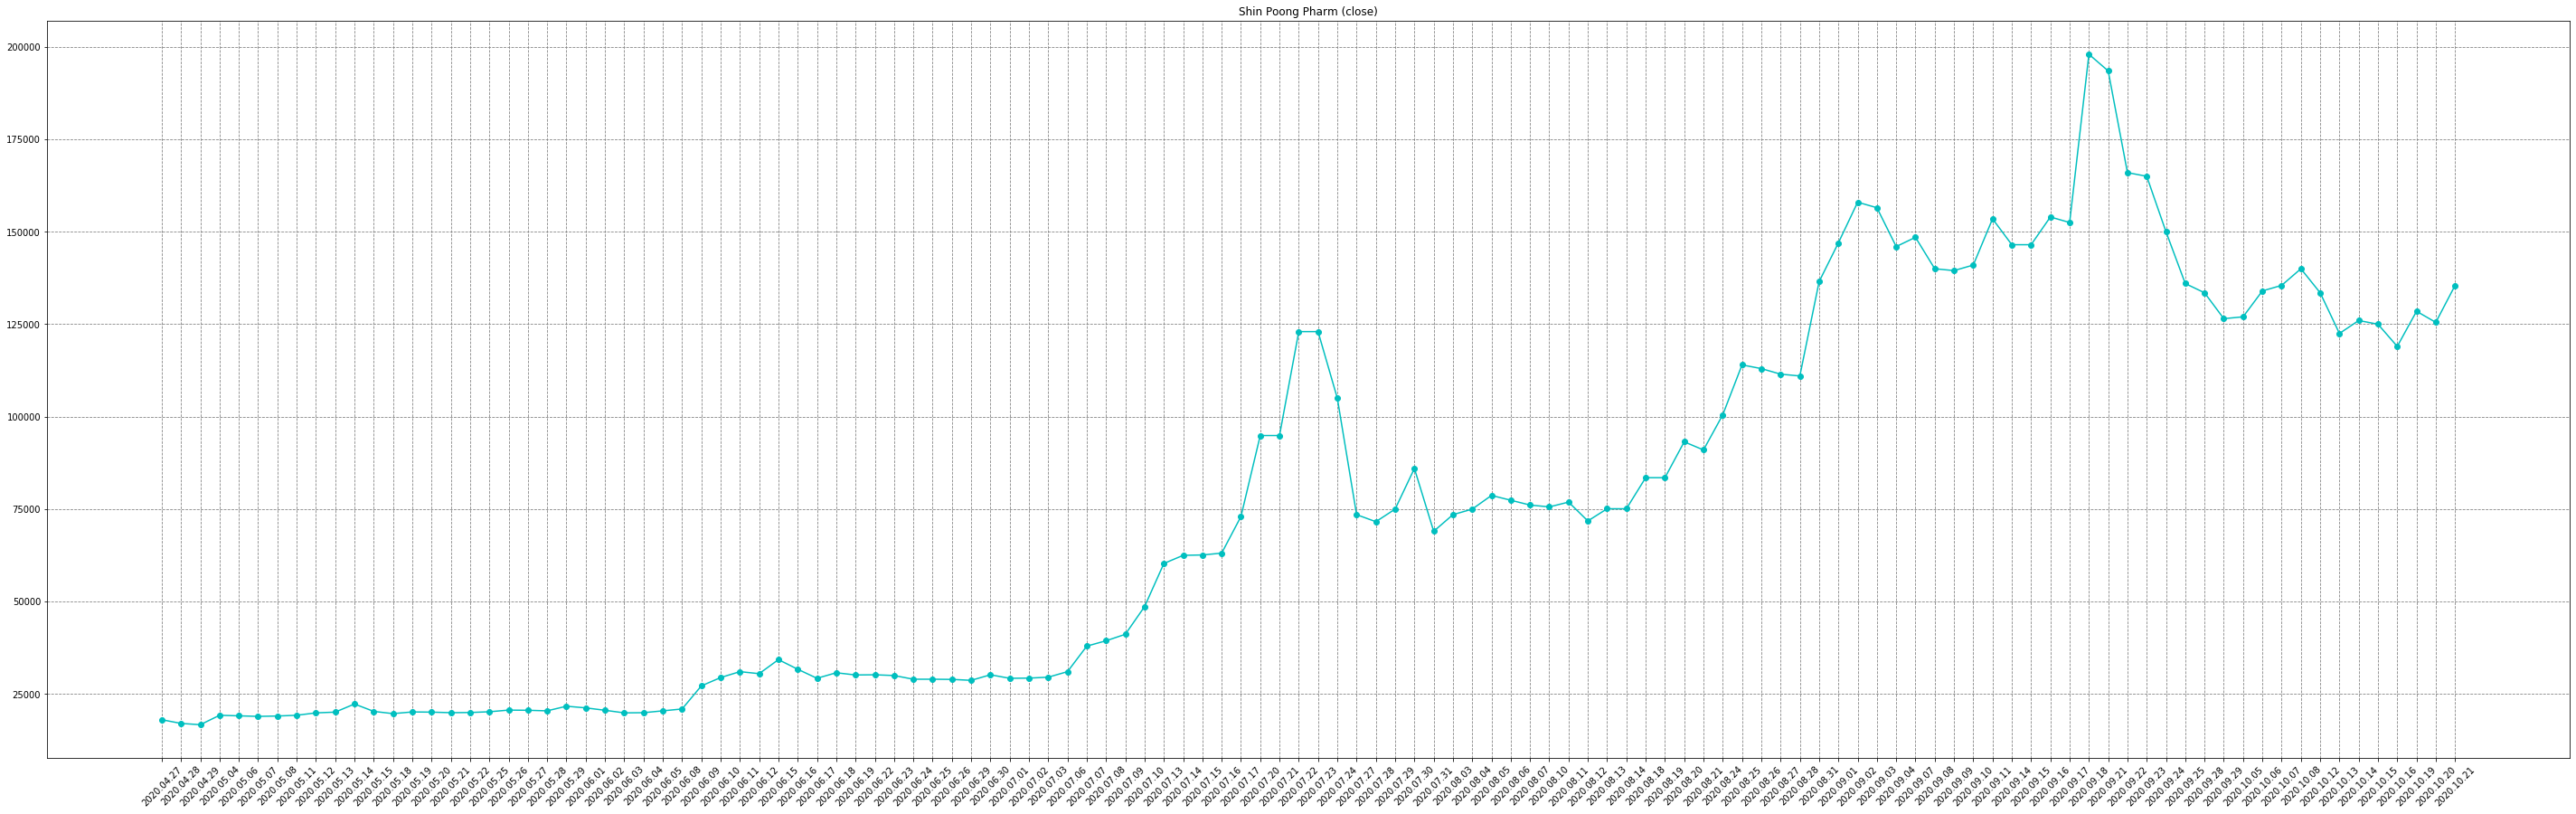

In [46]:
plt.figure(figsize = (50,15))
plt.title('Shin Poong Pharm (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

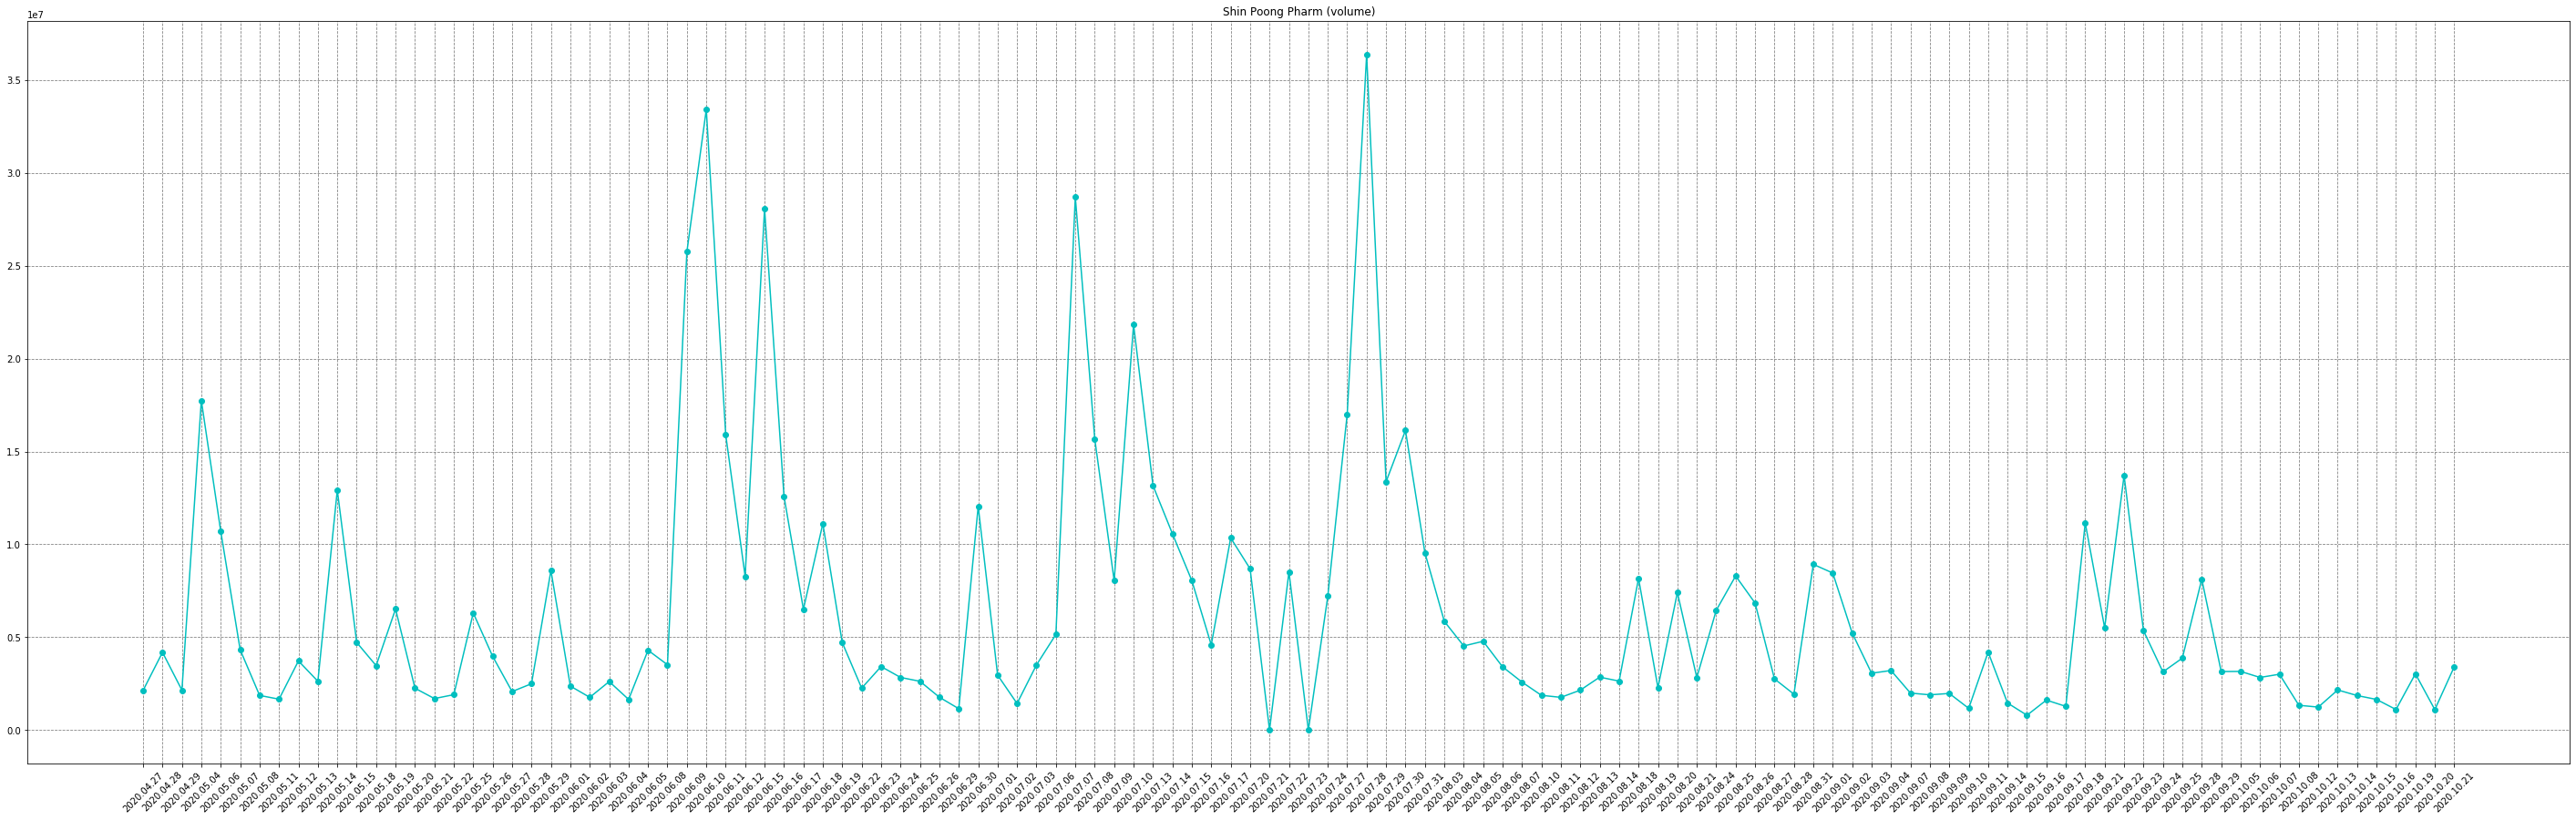

In [47]:
plt.figure(figsize = (50,15))
plt.title('Shin Poong Pharm (volume)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['거래량'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [ ]:
!conda install r-irkernel